<a href="https://colab.research.google.com/github/kavana-senorita/Movie-Recommendation-System-/blob/main/Movie_Recomendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Movie Recommendation System :** A movie recommendation system is a type of machine learning system designed to suggest movies to users based on their preferences and viewing history. The goal is to personalize movie recommendations to improve user satisfaction and engagement. Movie recommendation systems are widely used on platforms like Netflix, Amazon Prime, and YouTube.Movie recommendation systems have become an integral part of streaming platforms, offering personalized movie suggestions that improve user experience by helping viewers discover content tailored to their tastes.


In [4]:
import pandas as pd
import numpy as np
import difflib
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [5]:
#Importing the dataset
df=pd.read_csv("/content/Movie dataset.csv")
df

,Movie_ID,Movie_Title,Movie_Genre,Movie_Language,Movie_Budget,Movie_Popularity,Movie_Release_Date,Movie_Revenue,Movie_Runtime,Movie_Vote,...,Movie_Homepage,Movie_Keywords,Movie_Overview,Movie_Production_House,Movie_Production_Country,Movie_Spoken_Language,Movie_Tagline,Movie_Cast,Movie_Crew,Movie_Director
0,1,Four Rooms,Crime Comedy,en,4000000,22.876230,09-12-1995,4300000,98.0,6.5,...,NaN,hotel new year's eve witch bet hotel room,It's Ted the Bellhop's first night on the job....,"[{""name"": ""Miramax Films"", ""id"": 14}, {""name"":...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]",Twelve outrageous guests. Four scandalous requ...,Tim Roth Antonio Banderas Jennifer Beals Madon...,"[{'name': 'Allison Anders', 'gender': 1, 'depa...",Allison Anders
1,2,Star Wars,Adventure Action Science Fiction,en,11000000,126.393695,25-05-1977,775398007,121.0,8.1,...,http://www.starwars.com/films/star-wars-episod...,android galaxy hermit death star lightsaber,Princess Leia is captured and held hostage by ...,"[{""name"": ""Lucasfilm"", ""id"": 1}, {""name"": ""Twe...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]","A long time ago in a galaxy far, far away...",Mark Hamill Harrison Ford Carrie Fisher Peter ...,"[{'name': 'George Lucas', 'gender': 2, 'depart...",George Lucas
2,3,Finding Nemo,Animation Family,en,94000000,85.688789,30-05-2003,940335536,100.0,7.6,...,http://movies.disney.com/finding-nemo,father son relationship harbor underwater fish...,"Nemo, an adventurous young clownfish, is unexp...","[{""name"": ""Pixar Animation Studios"", ""id"": 3}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]","There are 3.7 trillion fish in the ocean, they...",Albert Brooks Ellen DeGeneres Alexander Gould ...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton
3,4,Forrest Gump,Comedy Drama Romance,en,55000000,138.133331,06-07-1994,677945399,142.0,8.2,...,NaN,vietnam veteran hippie mentally disabled runni...,A man with a low IQ has accomplished great thi...,"[{""name"": ""Paramount Pictures"", ""id"": 4}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]","The world will never be the same, once you've ...",Tom Hanks Robin Wright Gary Sinise Mykelti Wil...,"[{'name': 'Alan Silvestri', 'gender': 2, 'depa...",Robert Zemeckis
4,5,American Beauty,Drama,en,15000000,80.878605,15-09-1999,356296601,122.0,7.9,...,http://www.dreamworks.com/ab/,male nudity female nudity adultery midlife cri...,"Lester Burnham, a depressed suburban father in...","[{""name"": ""DreamWorks SKG"", ""id"": 27}, {""name""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]",Look closer.,Kevin Spacey Annette Bening Thora Birch Wes Be...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4755,4784,Midnight Cabaret,Horror,en,0,0.001389,01-01-1990,0,94.0,0.0,...,NaN,NaN,A Broadway producer puts on a play with a Devi...,[],[],"[{""iso_639_1"": ""en"", ""name"": ""English""}]",The hot spot where Satan's waitin'.,Lisa Hart Carroll Michael Des Barres Paul Drak...,"[{'name': 'Pece Dingo', 'gender': 0, 'departme...",Pece Dingo
4756,4785,Growing Up Smith,Comedy Family Drama,en,0,0.710870,03-02-2017,0,102.0,7.4,...,http://www.growingupsmithmovie.com,NaN,"In 1979, an Indian family moves to America wit...",[],[],"[{""iso_639_1"": ""en"", ""name"": ""English""}]",It’s better to stand out than to fit in.,Roni Akurati Brighton Sharbino Jason Lee Anjul...,"[{'name': 'Frank Lotito', 'gender': 0, 'depart...",Frank Lotito
4757,4786,8 Days,Thriller Drama,en,0,0.015295,15-06-2014,0,90.0,0.0,...,NaN,christian film sex trafficking,"After sneaking to a party with her friends, 16...","[{""name"": "

In [ ]:
#To check Number of rows and Columns
df.shape

(4760, 21)

In [ ]:
df.size

99960

In [ ]:
#To get the Information About Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4760 entries, 0 to 4759
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Movie_ID                  4760 non-null   int64  
 1   Movie_Title               4760 non-null   object 
 2   Movie_Genre               4760 non-null   object 
 3   Movie_Language            4760 non-null   object 
 4   Movie_Budget              4760 non-null   int64  
 5   Movie_Popularity          4760 non-null   float64
 6   Movie_Release_Date        4760 non-null   object 
 7   Movie_Revenue             4760 non-null   int64  
 8   Movie_Runtime             4758 non-null   float64
 9   Movie_Vote                4760 non-null   float64
 10  Movie_Vote_Count          4760 non-null   int64  
 11  Movie_Homepage            1699 non-null   object 
 12  Movie_Keywords            4373 non-null   object 
 13  Movie_Overview            4757 non-null   object 
 14  Movie_Pr

**Exploratory Data Anqalysis:**Exploratory Data Analysis (EDA) is the process of exploring, investigating and gathering insights from data using statistical measures and visualizations. The objective of EDA is to develop and understanding of data, by uncovering trends, relationships and patterns.

EDA is both a science and an art. On the one hand it requires the knowledge of statistics, visualization techniques and data analysis tools like Numpy, Pandas, Seaborn etc. On the other hand, it requires asking interesting questions to guide the investigation and interpreting numbers & figures to generate useful insights.

In [ ]:
#Describe the Data Frame
df.describe()

,Movie_ID,Movie_Budget,Movie_Popularity,Movie_Revenue,Movie_Runtime,Movie_Vote,Movie_Vote_Count
count,4760.000000,4.760000e+03,4760.000000,4.760000e+03,4758.000000,4760.000000,4760.000000
mean,2382.566387,2.920129e+07,21.599510,8.263743e+07,107.184111,6.113866,692.508403
std,1377.270159,4.075620e+07,31.887919,1.630554e+08,21.960332,1.141294,1235.007337
min,1.000000,0.000000e+00,0.000372,0.000000e+00,0.000000,0.000000,0.000000
25%,1190.750000,9.257500e+05,4.807074,0.000000e+00,94.000000,5.600000,55.000000
50%,2380.500000,1.500000e+07,13.119058,1.944716e+07,104.000000,6.200000,238.000000
75%,3572.250000,4.000000e+07,28.411929,9.341276e+07,118.000000,6.800000,740.250000
max,4788.000000,3.800000e+08,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [ ]:
#To check if there is any missing values
df.isna().sum()/len(df) * 100

,0
Movie_ID,0.000000
Movie_Title,0.000000
Movie_Genre,0.000000
Movie_Language,0.000000
Movie_Budget,0.000000
Movie_Popularity,0.000000
Movie_Release_Date,0.000000
Movie_Revenue,0.000000
Movie_Runtime,0.042017
Movie_Vote,0.000000


In [ ]:
#To check the duplicate values
dup=df.duplicated().value_counts()
dup

,count
False,4760


Text(0.5, 1.0, 'duplicate values')

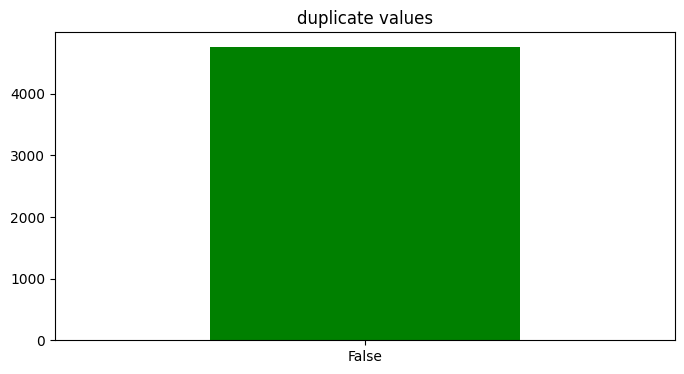

In [ ]:
#By using the barplot we can see the if there is any duplicate values or not
plt.figure(figsize=(8,4))
dup.plot(kind='bar',color =['g','r'])
plt.xticks(rotation=360)
plt.title('duplicate values')

In [ ]:
#selecting relevant features for recommendation
select_cols=['Movie_Genre','Movie_Keywords','Movie_Tagline','Movie_Cast','Movie_Director']
select_cols

['Movie_Genre',
 'Movie_Keywords',
 'Movie_Tagline',
 'Movie_Cast',
 'Movie_Director']

In [ ]:
#Replacing the null values with null string
for feature in select_cols:
  df[feature]=df[feature].fillna('')

In [ ]:
#Combining all the selected features
combined_features = df['Movie_Genre']+' '+df['Movie_Keywords']+' '+df['Movie_Tagline']+' '+df['Movie_Cast']+' '+df['Movie_Director']
combined_features

,0
0,Crime Comedy hotel new year's eve witch bet ho...
1,Adventure Action Science Fiction android galax...
2,Animation Family father son relationship harbo...
3,Comedy Drama Romance vietnam veteran hippie me...
4,Drama male nudity female nudity adultery midli...
...,...
4755,Horror The hot spot where Satan's waitin'. Li...
4756,Comedy Family Drama It’s better to stand out ...
4757,Thriller Drama christian film sex trafficking ...
4758,Family


In [ ]:
#converting the text data to feature vectors(numerical values)
vectorizer = TfidfVectorizer()

In [ ]:
feature_vectors = vectorizer.fit_transform(combined_features)


In [ ]:
print(feature_vectors)

  (0, 3583)	0.06486754376295062
  (0, 3240)	0.04527089872278055
  (0, 7213)	0.25146675849405775
  (0, 10898)	0.17625708810661284
  (0, 17052)	0.26079573581490934
  (0, 5059)	0.29553419178998613
  (0, 16862)	0.12768803549311025
  (0, 1595)	0.15687561633854538
  (0, 13052)	0.1465525095337543
  (0, 15708)	0.17654247479915475
  (0, 11362)	0.18801785343006192
  (0, 6463)	0.18801785343006192
  (0, 5662)	0.1465525095337543
  (0, 13467)	0.19712637387361423
  (0, 12731)	0.19712637387361423
  (0, 614)	0.07642616241686973
  (0, 11244)	0.08262965296941757
  (0, 9206)	0.15186283580984414
  (0, 1495)	0.19712637387361423
  (0, 7454)	0.14745635785412262
  (0, 7071)	0.19822417598406614
  (0, 5499)	0.11454057510303811
  (0, 3878)	0.11998399582562203
  (0, 11242)	0.07277788238484746
  (0, 15219)	0.09800472886453934
  :	:
  (4757, 3485)	0.199161573117024
  (4757, 1184)	0.18890726729447022
  (4757, 14568)	0.24255077606762876
  (4757, 15508)	0.24255077606762876
  (4757, 5802)	0.24255077606762876
  (4757, 81

In [ ]:
#getting similarity score using cosine similarity
similarity = cosine_similarity(feature_vectors)

In [ ]:
print(similarity)

[[1.         0.01351235 0.03570468 ... 0.         0.         0.        ]
 [0.01351235 1.         0.00806674 ... 0.         0.         0.        ]
 [0.03570468 0.00806674 1.         ... 0.         0.08014876 0.        ]
 ...
 [0.         0.         0.         ... 1.         0.         0.        ]
 [0.         0.         0.08014876 ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]]


In [ ]:
print(similarity.shape)

(4760, 4760)


**Getting the Movie Name From the user**

In [ ]:
#getting Movie name from the user
movie_name =input("Enter your favorite movie name:  ")

Enter your favorite movie name:  Iron Man


In [ ]:
#create the list of all movie names given in the datasets
list_of_all_titles = df['Movie_Title'].tolist()
print(list_of_all_titles)

['Four Rooms', 'Star Wars', 'Finding Nemo', 'Forrest Gump', 'American Beauty', 'Dancer in the Dark', 'The Fifth Element', 'Metropolis', 'My Life Without Me', 'Pirates of the Caribbean: The Curse of the Black Pearl', 'Kill Bill: Vol. 1', 'Jarhead', 'Apocalypse Now', 'Unforgiven', 'The Simpsons Movie', 'Eternal Sunshine of the Spotless Mind', 'Amores perros', "Pirates of the Caribbean: Dead Man's Chest", 'A History of Violence', '2001: A Space Odyssey', '8 Mile', 'Absolute Power', 'Brazil', 'Walk the Line', 'Million Dollar Baby', 'Billy Elliot', 'American History X', 'War of the Worlds', 'Mars Attacks!', 'Before Sunrise', 'Memento', 'Blade Runner', 'Hero', 'Before Sunset', 'Open Water', 'Raiders of the Lost Ark', 'Indiana Jones and the Temple of Doom', 'Indiana Jones and the Last Crusade', 'Beverly Hills Cop', 'Armageddon', 'Beverly Hills Cop II', 'Gladiator', 'Lock, Stock and Two Smoking Barrels', 'Taxi Driver', 'Run Lola Run', 'Back to the Future', 'Predator', 'Snatch', 'Scarface', 'Pr

In [ ]:
#finding the close match for the movie name given by the user
find_close_match=difflib.get_close_matches(movie_name,list_of_all_titles)
print(find_close_match)

['Iron Man', 'Iron Man 3', 'Iron Man 2']


In [ ]:
close_match = find_close_match[0]
close_match

'Iron Man'

In [ ]:
#finding the index  of the movie with title
index_of_movie = df[df.Movie_Title == close_match]['Movie_ID'].values[0]
print(index_of_movie)

568


In [ ]:
#getting a list of similar movies
similarity_score=list(enumerate(similarity[index_of_movie]))
print(similarity_score)

[(0, 0.026990942208242455), (1, 0.010950507698138944), (2, 0.018806392274173616), (3, 0.028913528217961625), (4, 0.0), (5, 0.0), (6, 0.04527818444928707), (7, 0.018586667790081914), (8, 0.0), (9, 0.04536669475996405), (10, 0.06945245379615324), (11, 0.008931072914346628), (12, 0.018500407537554782), (13, 0.0), (14, 0.00789196005214734), (15, 0.01449570874675743), (16, 0.0), (17, 0.044703222447363855), (18, 0.008269983194635585), (19, 0.020222904227665553), (20, 0.01873282400803726), (21, 0.0), (22, 0.006966263873994487), (23, 0.009065984808544987), (24, 0.02272842249229887), (25, 0.027330812084579353), (26, 0.0), (27, 0.007242460629470043), (28, 0.03020320001792047), (29, 0.014894235274266102), (30, 0.0), (31, 0.0), (32, 0.11981278942051382), (33, 0.0076219084873372185), (34, 0.009583388440146605), (35, 0.0416606444301921), (36, 0.017574944265830113), (37, 0.04275348186567464), (38, 0.025841364057983297), (39, 0.038877689068816626), (40, 0.013801714159467784), (41, 0.013641836385016062

In [ ]:
len(similarity_score)

4760

In [ ]:
#Sorting the movies based on similarity_score(highest value - lowest value)
sorted_similar_movies = sorted(similarity_score, key = lambda  x:x[1], reverse = True)
print(sorted_similar_movies)

[(568, 1.0), (570, 0.23774638753738936), (3724, 0.1834643245085129), (2361, 0.16436286018967583), (418, 0.16093391568075593), (1799, 0.16089450005652559), (1681, 0.15366093144614124), (1540, 0.14326199460383862), (3590, 0.14011656375639475), (682, 0.13792739122041112), (3459, 0.13763496549881873), (495, 0.13172799619425368), (1732, 0.13151019053607488), (1333, 0.1306837465539578), (1736, 0.12838464360565432), (1113, 0.12722643271405384), (4279, 0.12378550300043253), (1578, 0.12185074857259043), (4742, 0.12136086712670664), (32, 0.11981278942051382), (2113, 0.11937772926054144), (2055, 0.11793110203851843), (1788, 0.11512033774631322), (4589, 0.10981794830020203), (1948, 0.10926697883678249), (668, 0.10384678106617845), (2697, 0.10280361085864685), (904, 0.10232723973821153), (1844, 0.10201289204738176), (3457, 0.09941298667653829), (2810, 0.09750823594715402), (1784, 0.09669182663465674), (1495, 0.0961889423177075), (905, 0.09589353868850639), (644, 0.0951957080181505), (1791, 0.093880

In [ ]:
#print the name of similar movies based on index
print('Movies Suggested for you: \n')

i = 1

for movie in sorted_similar_movies:
  index = movie[0]
  title_from_index = df[df.index == index]['Movie_Title'].values[0]
  if (i<30):
    print(i,'.', title_from_index)
    i+=1

Movies Suggested for you: 

1 . The Forbidden Kingdom
2 . The Mummy: Tomb of the Dragon Emperor
3 . Resident Evil: Retribution
4 . The Warlords
5 . Lethal Weapon 4
6 . The One
7 . War
8 . Unleashed
9 . Snow Flower and the Secret Fan
10 . Kiss of the Dragon
11 . Warriors of Virtue
12 . Curse of the Golden Flower
13 . The Medallion
14 . Kung Fu Panda
15 . Cradle 2 the Grave
16 . Shanghai Noon
17 . Gods of Egypt
18 . Stuart Little
19 . The Monkey King 2
20 . Hero
21 . The Legend of Drunken Master
22 . Young Sherlock Holmes
23 . Without a Paddle
24 . Dragon Blade
25 . Superman IV: The Quest for Peace
26 . Romeo Must Die
27 . Shinjuku Incident
28 . Rush Hour 3
29 . Stuart Little 2


**Movie Recommendation System**

In [ ]:
movie_name=input("Enter your Favourite movie name :  ")

list_of_all_titles = df['Movie_Title'].tolist()

find_close_match=difflib.get_close_matches(movie_name,list_of_all_titles)

close_match = find_close_match[0]

index_of_movie = df[df.Movie_Title == close_match]['Movie_ID'].values[0]

similarity_score=list(enumerate(similarity[index_of_movie]))

sorted_similar_movies = sorted(similarity_score, key = lambda  x:x[1], reverse = True)

print('Movies Suggested for you : \n')

i = 1

for movie in sorted_similar_movies:
  index = movie[0]
  title_from_index = df[df.index == index]['Movie_Title'].values[0]
  if (i<30):
    print(i,'.', title_from_index)
    i+=1


Enter your Favourite movie name :  Avatar
Movies Suggested for you : 

1 . Niagara
2 . Caravans
3 . My Week with Marilyn
4 . Brokeback Mountain
5 . Harry Brown
6 . Night of the Living Dead
7 . The Curse of Downers Grove
8 . The Boy Next Door
9 . Back to the Future
10 . The Juror
11 . Some Like It Hot
12 . Enough
13 . The Kentucky Fried Movie
14 . Eye for an Eye
15 . Welcome to the Sticks
16 . Alice Through the Looking Glass
17 . Superman III
18 . The Misfits
19 . Premium Rush
20 . Duel in the Sun
21 . Sabotage
22 . Small Soldiers
23 . All That Jazz
24 . Camping Sauvage
25 . The Raid
26 . Beyond the Black Rainbow
27 . To Kill a Mockingbird
28 . World Trade Center
29 . The Dark Knight Rises
